In [2]:
#install gutenbergr 
install.packages("gutenbergr")

NameError: name 'install' is not defined

In [3]:
library(gutenbergr)
gutenberg_metadata

NameError: name 'library' is not defined

In [128]:
#filter data
gutenberg_works()

gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
0,NA,NA,NA,en,NA,Public domain in the USA.,TRUE
1,The Declaration of Independence of the United States of America,"Jefferson, Thomas",1638,en,United States Law/American Revolutionary War/Politics,Public domain in the USA.,TRUE
2,The United States Bill of Rights The Ten Original Amendments to the Constitution of the United States,United States,1,en,American Revolutionary War/Politics/United States Law,Public domain in the USA.,TRUE
3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1666,en,NA,Public domain in the USA.,TRUE
4,"Lincoln's Gettysburg Address Given November 19, 1863 on the battlefield near Gettysburg, Pennsylvania, USA","Lincoln, Abraham",3,en,US Civil War,Public domain in the USA.,TRUE
5,The United States Constitution,United States,1,en,American Revolutionary War/Politics/United States/United States Law,Public domain in the USA.,TRUE
6,Give Me Liberty or Give Me Death,"Henry, Patrick",4,en,American Revolutionary War,Public domain in the USA.,TRUE
7,The Mayflower Compact,NA,NA,en,NA,Public domain in the USA.,TRUE
8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",3,en,US Civil War,Public domain in the USA.,TRUE
9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",3,en,US Civil War,Public domain in the USA.,TRUE


In [129]:
library(dplyr)
# download books with title
Oz <- gutenberg_download(c(54, 43936), meta_fields = "title")

In [130]:
library(tidytext)

words <- Oz %>%
  unnest_tokens(word, text)

In [131]:
word_counts <- words %>%
  anti_join(stop_words, by = "word") %>%
  count( title, word, sort = TRUE)
word_counts

title,word,n
The Wonderful Wizard of Oz,dorothy,346
The Marvelous Land of Oz,tip,288
The Marvelous Land of Oz,scarecrow,281
The Wonderful Wizard of Oz,scarecrow,224
The Marvelous Land of Oz,horse,183
The Wonderful Wizard of Oz,woodman,177
The Wonderful Wizard of Oz,lion,174
The Wonderful Wizard of Oz,oz,163
The Marvelous Land of Oz,jack,162
The Wonderful Wizard of Oz,illustration,153


In [132]:
# to save word count data as a csv
write.csv(word_counts,'Oz_word_count.csv')

In [15]:
# import sentiment analysis lexicons


In [ ]:
library(tidytext)

get_sentiments("afinn")
get_sentiments("bing")
get_sentiments("nrc")


In [ ]:
# library(janeaustenr)
library(dplyr)
library(stringr)
tidy_Oz <- Oz %>%
  group_by(title) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%

  unnest_tokens(word, text) %>%
  anti_join(stop_words)
tidy_Oz

In [ ]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

tidy_Oz %>%
    inner_join(nrc_joy) %>%
  count(title, word, sort = TRUE)

In [135]:
library(tidyr)


Oz_sentiment <- tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(title, index = linenumber %/% 10, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


In [136]:
library(ggplot2)
jpeg("sentiment_10_plot.jpg")
ggplot(Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")
dev.off()

pdf 
  2

In [137]:
#save plot as a jpeg
jpeg("sentiment_10_plot.jpg")
library(ggplot2)

ggplot(Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")


In [138]:
library(tidyr)

Oz_sentiment <- tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(title, index = linenumber %/% 50, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)



Joining, by = "word"


In [140]:
library(ggplot2)
jpeg("sentiment_50_plot.jpg")
ggplot(Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")
dev.off()

pdf 
  2

In [141]:
library(tidyr)
jpeg("sentiment_100_plot.jpg")

Oz_sentiment <- tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(title, index = linenumber %/% 100, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

library(ggplot2)

ggplot(Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")
dev.off()

Joining, by = "word"


pdf 
  2

In [142]:
bing_word_counts <- tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts

Joining, by = "word"


word,sentiment,n
wicked,negative,83
beautiful,positive,56
majesty,positive,56
fast,positive,46
pretty,positive,43
wonderful,positive,43
golden,positive,42
afraid,negative,40
terrible,negative,40
fell,negative,39


Selecting by n


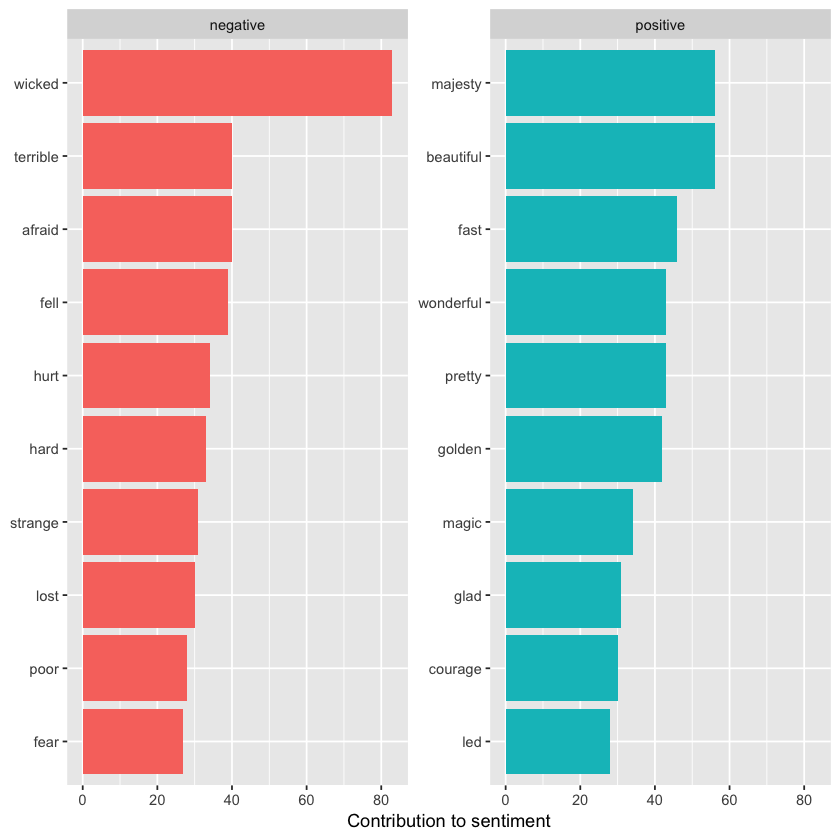

In [143]:
bing_word_counts %>%
  group_by(sentiment) %>%
  top_n(10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()

In [144]:
#remove "bug" from the negative word counts
custom_stop_words <- bind_rows(tibble(word = c("bug", "green"), 
                                          lexicon = c("custom")), 
                               stop_words)

custom_stop_words

word,lexicon
bug,custom
green,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART


In [149]:
#sentiment analysis without bug
library(dplyr)
library(stringr)
revised_tidy_Oz <- Oz %>%
  group_by(title) %>%
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text, regex("^chapter [\\divxlc]", 
                                                 ignore_case = TRUE)))) %>%
  ungroup() %>%

  unnest_tokens(word, text) %>%
  anti_join(custom_stop_words)
revised_tidy_Oz

Joining, by = "word"


gutenberg_id,title,linenumber,chapter,word
54,The Marvelous Land of Oz,1,0,marvelous
54,The Marvelous Land of Oz,2,0,land
54,The Marvelous Land of Oz,2,0,oz
54,The Marvelous Land of Oz,4,0,account
54,The Marvelous Land of Oz,5,0,adventures
54,The Marvelous Land of Oz,7,0,scarecrow
54,The Marvelous Land of Oz,8,0,tin
54,The Marvelous Land of Oz,8,0,woodman
54,The Marvelous Land of Oz,10,0,strange
54,The Marvelous Land of Oz,11,0,experiences


In [150]:
nrc_joy <- get_sentiments("nrc") %>% 
  filter(sentiment == "joy")

revised_tidy_Oz %>%
    inner_join(nrc_joy) %>%
  count(title, word, sort = TRUE)

Joining, by = "word"


title,word,n
The Marvelous Land of Oz,art,95
The Wonderful Wizard of Oz,found,47
The Marvelous Land of Oz,friend,40
The Wonderful Wizard of Oz,beautiful,39
The Wonderful Wizard of Oz,journey,31
The Wonderful Wizard of Oz,tree,30
The Wonderful Wizard of Oz,pretty,28
The Marvelous Land of Oz,journey,27
The Marvelous Land of Oz,found,26
The Wonderful Wizard of Oz,sun,23


In [153]:
library(tidyr)

Revised_Oz_sentiment <- revised_tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(title, index = linenumber %/% 50, sentiment) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(sentiment = positive - negative)

Joining, by = "word"


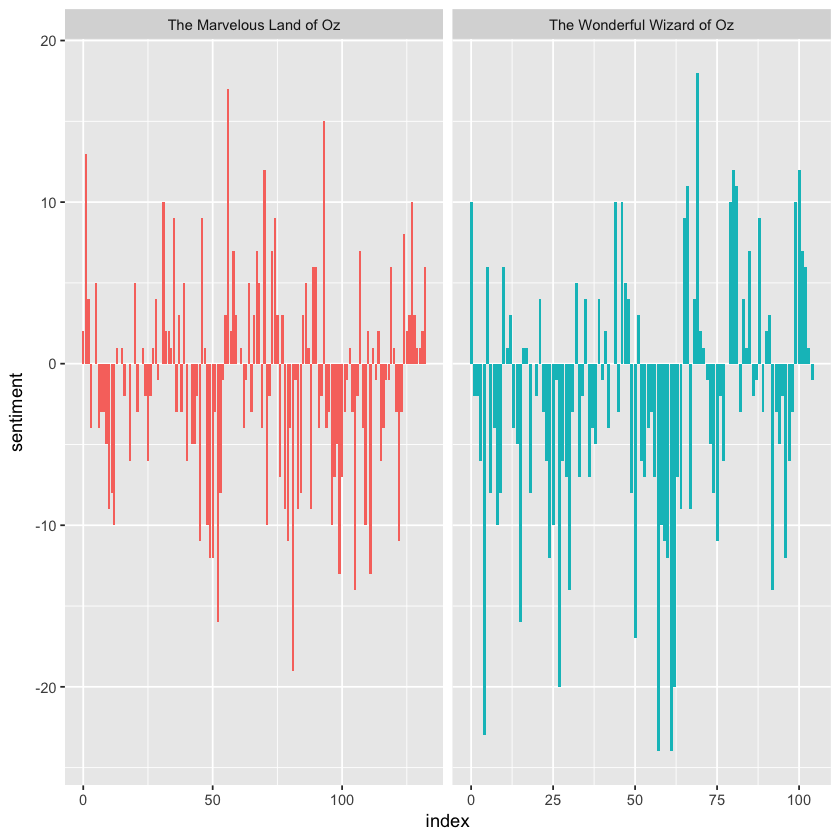

In [154]:
library(ggplot2)
ggplot(Revised_Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")


In [148]:
library(ggplot2)
jpeg("revised_sentiment_50_plot.jpg")
ggplot(Oz_sentiment, aes(index, sentiment, fill = title)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~title, ncol = 2, scales = "free_x")
dev.off()

pdf 
  2

Loading required package: RColorBrewer
Joining, by = "word"


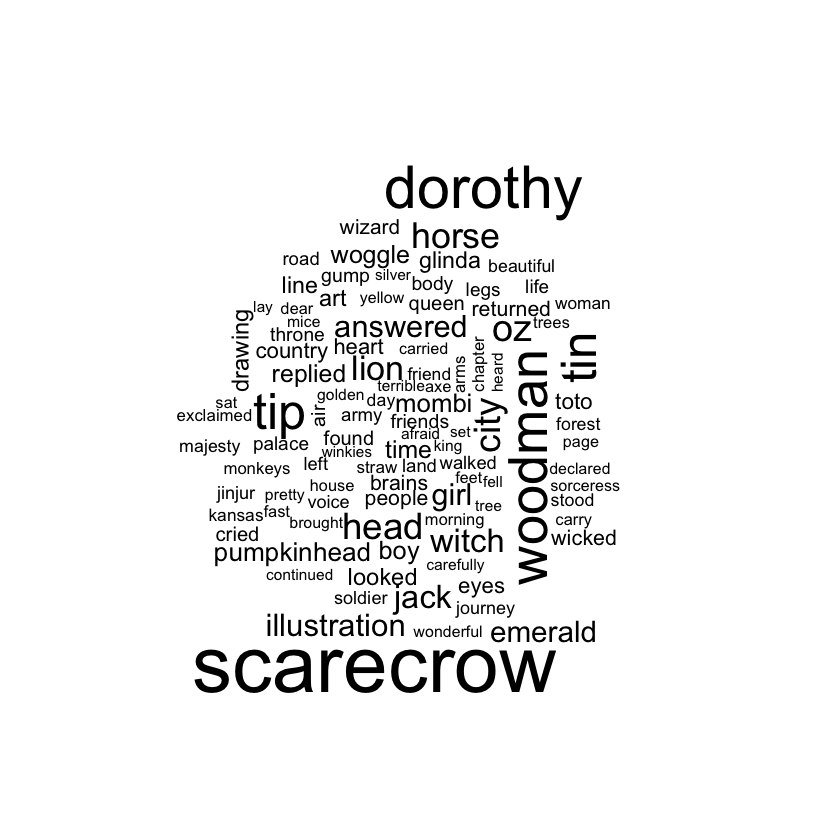

In [96]:
library(wordcloud)

tidy_Oz %>%
  anti_join(custom_stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

In [100]:
jpeg("common_word_cloud.jpg")

library(wordcloud)

tidy_Oz %>%
  anti_join(custom_stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))
dev.off()

Joining, by = "word"


pdf 
  2

In [99]:
jpeg("sentiment_word_cloud.jpg")

library(reshape2)

tidy_Oz %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("gray20", "gray80"),
                   max.words = 100)
dev.off()

Joining, by = "word"


pdf 
  2

In [ ]:
library(dplyr)

Grimm <- gutenberg_download(2591)